In [ ]:
from SPEN.cfg import SPEEDConfig
from SPEN.utils import SPEEDCamera
from SPEN.vis import display_image

import matplotlib.pyplot as plt
import numpy as np
from rich import print
from scipy.io import loadmat


# 绘制关键点

In [2]:
points_path = "./result_file/tangoPoints.mat"
points = loadmat(points_path)["tango3Dpoints"].T
print(points)

[[-0.37   -0.385   0.3215]
 [-0.37    0.385   0.3215]
 [ 0.37    0.385   0.3215]
 [ 0.37   -0.385   0.3215]
 [-0.37   -0.264   0.    ]
 [-0.37    0.304   0.    ]
 [ 0.37    0.304   0.    ]
 [ 0.37   -0.264   0.    ]
 [-0.5427  0.4877  0.2535]
 [ 0.5427  0.4877  0.2591]
 [ 0.305  -0.579   0.2515]]

In [3]:
display_image("img000004.jpg", display_point=True, points=points)

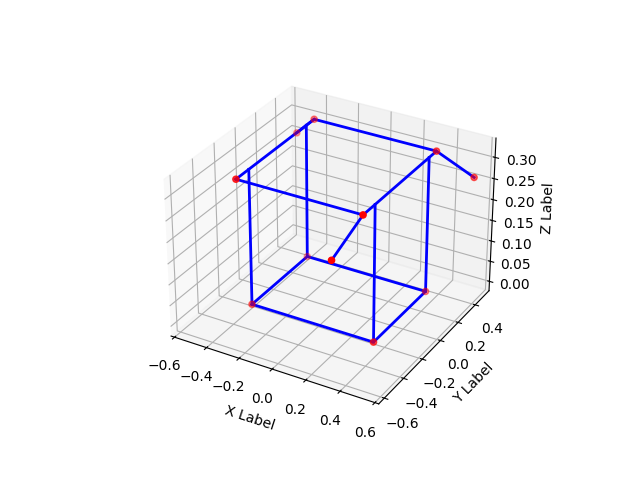

In [4]:
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

x = points[:, 0]
y = points[:, 1]
z = points[:, 2]
ax.scatter(x, y, z, c="r", marker="o")
ax.plot(x[[0, 1, 2, 3, 0]], y[[0, 1, 2, 3, 0]], z[[0, 1, 2, 3, 0]], linewidth=2, label="Line", color="blue")
ax.plot(x[[4, 5, 6, 7, 4]], y[[4, 5, 6, 7, 4]], z[[4, 5, 6, 7, 4]], linewidth=2, label="Line", color="blue")
ax.plot(x[[4, 0]], y[[4, 4]], z[[4, 0]], linewidth=2, label="Line", color="blue")
ax.plot(x[[5, 1]], y[[5, 5]], z[[5, 1]], linewidth=2, label="Line", color="blue")
ax.plot(x[[6, 2]], y[[6, 6]], z[[6, 2]], linewidth=2, label="Line", color="blue")
ax.plot(x[[7, 3]], y[[7, 7]], z[[7, 3]], linewidth=2, label="Line", color="blue")
ax.plot(x[[1, -3]], y[[1, -3]], z[[1, -3]], linewidth=2, label="Line", color="blue")
ax.plot(x[[2, -2]], y[[2, -2]], z[[2, -2]], linewidth=2, label="Line", color="blue")
ax.plot(x[[3, -1]], y[[3, -1]], z[[3, -1]], linewidth=2, label="Line", color="blue")
ax.set_xlabel("X Label")
ax.set_ylabel("Y Label")
ax.set_zlabel("Z Label")
plt.show()

In [5]:
from SPEN.utils import SPEEDCamera

In [6]:
imgsz = (1200, 1920)
camera = SPEEDCamera(imgsz)
print(camera.K_image)

[[3.00341297e+03 0.00000000e+00 9.60000000e+02]
 [0.00000000e+00 3.00341297e+03 6.00000000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

# 数据增强

In [9]:
from SPEN.cfg import SPEEDConfig
from SPEN.data import SPEEDTrainDataset

In [7]:
display_image("img009592.jpg",
              display_label_axis=False,
              save_path="./result_file/009592.png",)

In [38]:
config = SPEEDConfig()
config.cache = False
config.ZAxisRotation_p = 0.0
config.CropAndPadSafe_p = 0.0
config.DropBlockSafe_p = 0.0
config.CropAndPaste_p = 0.0
config.AlbumentationAug_p = 0.0
dataset = SPEEDTrainDataset(config)
image_tensor, image, label = dataset[9545]
display_image(image=image,
              display_label_axis=False,
              save_path="./result_file/2.7.png")

In [ ]:
config.ZAxisRotation_p = 0.0
config.CropAndPadSafe_p = 1.0
config.DropBlockSafe_p = 0.0
config.CropAndPaste_p = 0.0
config.AlbumentationAug_p = 0.0
dataset = SPEEDTrainDataset(config)
image_tensor, image, label = dataset[9545]
display_image(image=image,
              display_label_axis=False,
              save_path="./result_file/2.7cropandpad.png")

In [46]:
config.ZAxisRotation_p = 0.0
config.CropAndPadSafe_p = 0.0
config.DropBlockSafe_p = 1.0
config.CropAndPaste_p = 0.0
config.AlbumentationAug_p = 0.0
dataset = SPEEDTrainDataset(config)
image_tensor, image, label = dataset[9545]
display_image(image=image,
              display_label_axis=False,
              save_path="./result_file/2.7dropblocksafe.png")

In [1]:
from SPEN.cfg import SPEEDConfig
from SPEN.data import SPEEDTrainDataset
from SPEN.vis import display_image
config = SPEEDConfig()
config.ZAxisRotation_p = 0.0
config.CropAndPadSafe_p = 0.0
config.DropBlockSafe_p = 0.0
config.CropAndPaste_p = 0.0
config.AlbumentationAug_p = 1.0
dataset = SPEEDTrainDataset(config)
image_tensor, image, label = dataset[9545]
display_image(image=image,
              display_label_axis=False,
              save_path="./result_file/2.9color.png")

In [7]:
from SPEN.cfg import SPEEDConfig
from SPEN.data import SPEEDTrainDataset
from SPEN.vis import display_image
config = SPEEDConfig()
config.ZAxisRotation_p = 1.0
config.CropAndPadSafe_p = 0.0
config.DropBlockSafe_p = 0.0
config.CropAndPaste_p = 0.0
config.AlbumentationAug_p = 0.0
dataset = SPEEDTrainDataset(config)
image_tensor, image, label = dataset[9545]
display_image(image=image,
              display_label_axis=True,
              pos=label["pos"],
              ori=label["ori"],
              save_path="./result_file/2.10zr.png")

In [1]:
from SPEN.cfg import SPEEDplusConfig
from SPEN.data import SPEEDplusTrainDataset
from SPEN.vis import display_image
from torch.utils.data import DataLoader

config = SPEEDplusConfig()
config.cache = False
config.resize_first = False
config.ZAxisRotation_p = 1.0
dataset = SPEEDplusTrainDataset(config)
train_dataloader = DataLoader(
    dataset,
    batch_size=1,
    shuffle=True,
)
save_path = "./test.png"
for batch in train_dataloader:
    image_tensor, image, label = batch
    image = image.squeeze().numpy()
    print(label["points"].squeeze().numpy())
    display_image(image=image,
                  pos=label["pos"].squeeze().numpy(),
                  ori=label["ori"].squeeze().numpy(),
                  box=label["box"].squeeze().numpy(),
                  points=label["points"].squeeze().numpy(),
                  display_points=True,
                  display_box=True,
                  show=False,
                  save_path=save_path)
    break

[[1.215e+03 5.410e+02 1.000e+00]
 [1.462e+03 5.220e+02 1.000e+00]
 [1.298e+03 7.490e+02 1.000e+00]
 [1.055e+03 7.840e+02 1.000e+00]
 [1.174e+03 4.320e+02 1.000e+00]
 [1.355e+03 4.250e+02 1.000e+00]
 [1.201e+03 6.530e+02 1.000e+00]
 [1.023e+03 6.730e+02 1.000e+00]
 [1.515e+03 4.420e+02 1.000e+00]
 [1.279e+03 7.740e+02 1.000e+00]
 [9.850e+02 7.490e+02 1.000e+00]]
